In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [2]:
def loadDataH5(fileName):
    dataDict = {}
    with h5py.File(fileName, 'r') as file:
        for key in file.keys():
            dataDict[key] = np.array(file[key])
    return dataDict

data = loadDataH5("/storage/mxg1065/MultiClassGNN/data_three_layers.h5")
lossData = data["lossData"]
scores = data["scores"]
truth_labels = data["truth_labels"]
avgLoss_TrueTrain = data['avgLoss_TrueTrain']
avgLoss_TrueTest = data['avgLoss_TrueTest']
avgLoss_BkgTrain = data['avgLoss_BkgTrain']
avgLoss_BkgTest = data['avgLoss_BkgTest']

### 3 Layer Model Loss & ROC/AUC

In [3]:
epoch_number = []
for i in range(1, len(lossData)+1):
    epoch_number.append(i)

In [4]:
# plt.plot(epoch_number, lossData, label='Loss per Epoch')
# plt.xlabel("Epoch Number")
# plt.ylabel("Loss")
# plt.title("Loss per Epoch for Multi-Class Case with Three Layers")
# plt.legend()
# plt.show()

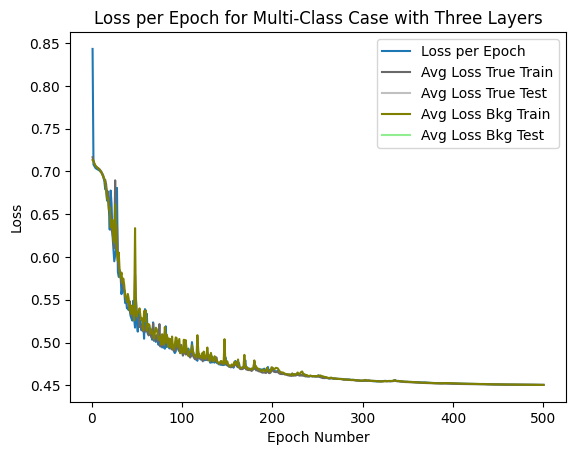

In [5]:
plt.plot(epoch_number, lossData, label='Loss per Epoch')
plt.plot(epoch_number, avgLoss_TrueTrain, 'dimgray', label='Avg Loss True Train')
plt.plot(epoch_number, avgLoss_TrueTest, 'silver', label='Avg Loss True Test')
plt.plot(epoch_number, avgLoss_BkgTrain, 'olive', label = 'Avg Loss Bkg Train')
plt.plot(epoch_number, avgLoss_BkgTest, 'lightgreen', label = 'Avg Loss Bkg Test')
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.title("Loss per Epoch for Multi-Class Case with Three Layers")
plt.legend()
plt.show()

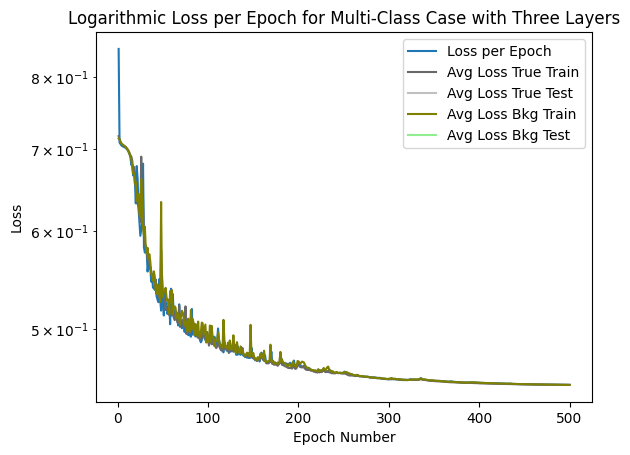

In [6]:
plt.plot(epoch_number, lossData, label='Loss per Epoch')
plt.plot(epoch_number, avgLoss_TrueTrain, 'dimgray', label='Avg Loss True Train')
plt.plot(epoch_number, avgLoss_TrueTest, 'silver', label='Avg Loss True Test')
plt.plot(epoch_number, avgLoss_BkgTrain, 'olive', label = 'Avg Loss Bkg Train')
plt.plot(epoch_number, avgLoss_BkgTest, 'lightgreen', label = 'Avg Loss Bkg Test')
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.yscale("log")
plt.title("Logarithmic Loss per Epoch for Multi-Class Case with Three Layers")
plt.legend()
plt.show()

In [7]:
def plotROCCurve(epoch_scores, epoch_truth_labels, epoch_number):
    fpr, tpr, _ = roc_curve(epoch_truth_labels, epoch_scores)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, color = 'darkorange', label = 'ROC curve (area = %0.3f)' % roc_auc)
    plt.legend(loc = "lower right")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve for Epoch " + str(epoch_number))
    plt.show()

In [8]:
def createAUCDataPoints(epoch_scores, epoch_truth_labels, total_epochs):
    auc_scores = np.zeros(total_epochs)  # Preallocate array for efficiency
    for i in range(0, total_epochs):
        fpr, tpr, _ = roc_curve(epoch_truth_labels[i], epoch_scores[i])
        roc_auc = auc(fpr, tpr)
        auc_scores[i] = roc_auc  # Directly assign to preallocated array
    plt.plot(range(1,total_epochs+1) ,auc_scores)
    plt.xlabel("Epoch Number")
    plt.ylabel("Area Under the Curve")
    plt.title("AUC as a function of Epoch Number")
    plt.show()

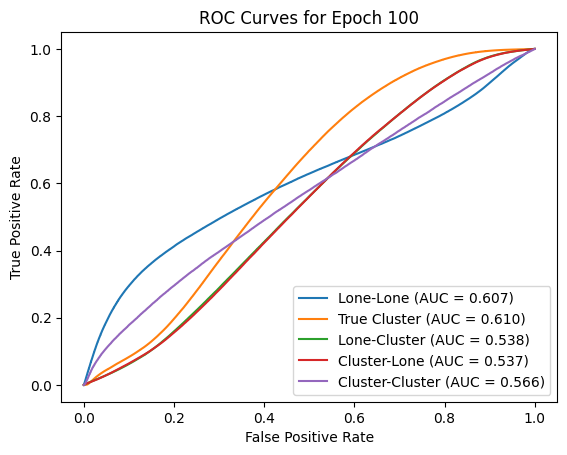

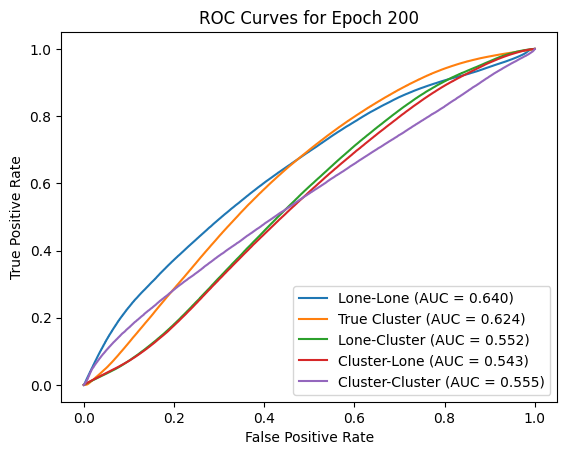

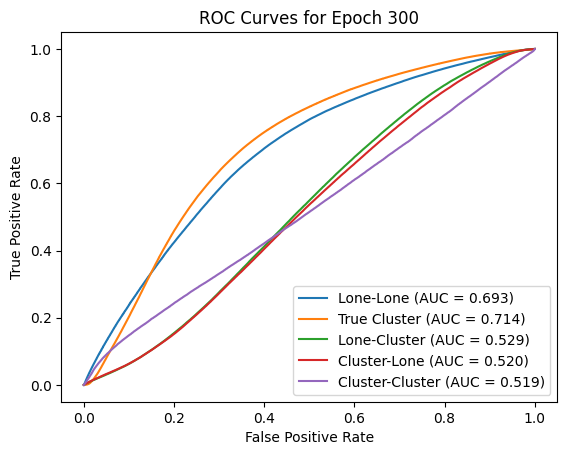

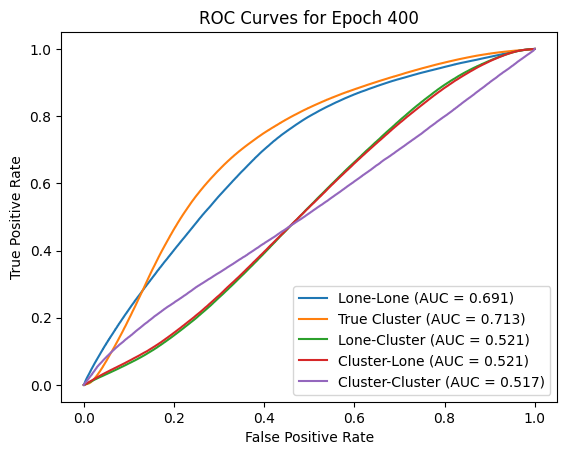

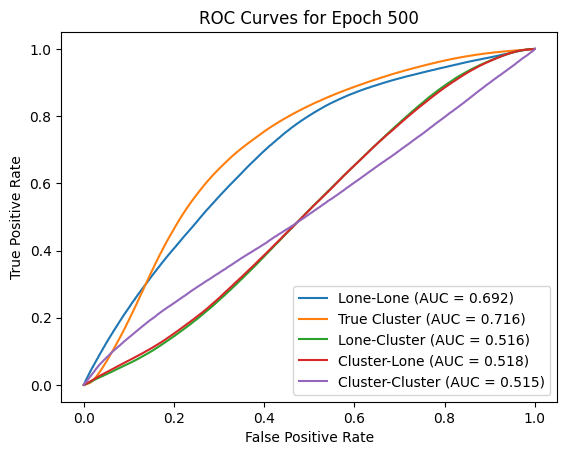

In [9]:
# Epoch numbers for plot labels
epoch_number = list(range(1, len(lossData) + 1))

# Define custom class labels with the new mapping
class_labels = ["Lone-Lone", "True Cluster", "Lone-Cluster", "Cluster-Lone", "Cluster-Cluster"]

# Function to plot ROC curve for multiclass classification with custom labels
def plotROCCurveMulticlass(epoch_scores, epoch_truth_labels, epoch_number, num_classes=5):
    plt.figure()

    # Iterate over each class and compute the ROC curve in a one-vs-all fashion
    for class_idx in range(num_classes):
        # Convert truth labels to one-vs-all format (1 for current class, 0 for all others)
        binary_truth_labels = (epoch_truth_labels == class_idx).astype(int)
        
        # Get the predicted probabilities/scores for the current class
        class_scores = epoch_scores[:, class_idx]  # scores for the current class
        
        # Compute the ROC curve
        fpr, tpr, _ = roc_curve(binary_truth_labels, class_scores)
        roc_auc = auc(fpr, tpr)
        
        # Plot the ROC curve for the current class with a custom label
        plt.plot(fpr, tpr, label=f'{class_labels[class_idx]} (AUC = {roc_auc:.3f})')

    plt.legend(loc="lower right")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curves for Epoch {epoch_number}")
    plt.show()

# Function to plot AUC over epochs for each class with custom labels
def createAUCDataPointsMulticlass(epoch_scores, epoch_truth_labels, total_epochs, num_classes=5):
    auc_scores = np.zeros((total_epochs, num_classes))  # Preallocate array for efficiency
    
    for i in range(total_epochs):
        for class_idx in range(num_classes):
            # Convert truth labels to one-vs-all format
            binary_truth_labels = (epoch_truth_labels[i] == class_idx).astype(int)
            
            # Get the predicted probabilities/scores for the current class
            class_scores = epoch_scores[i][:, class_idx]
            
            # Compute ROC and AUC
            fpr, tpr, _ = roc_curve(binary_truth_labels, class_scores)
            roc_auc = auc(fpr, tpr)
            auc_scores[i, class_idx] = roc_auc

    # Plot AUC as a function of epoch number for each class with custom labels
    for class_idx in range(num_classes):
        plt.plot(range(1, total_epochs + 1), auc_scores[:, class_idx], label=f'{class_labels[class_idx]}')
    
    plt.xlabel("Epoch Number")
    plt.ylabel("Area Under the Curve")
    plt.title("AUC as a function of Epoch Number for each class")
    plt.legend()
    plt.show()

# Total number of epochs
epochNum = 1000
intervalShowingROCGraph = epochNum // 10  # every 100 epochs

# Plot ROC curves at specific intervals with custom labels
for i in range(0, epochNum//2):
    if (i+1) % intervalShowingROCGraph == 0:
        plotROCCurveMulticlass(scores[i], truth_labels[i], i+1)

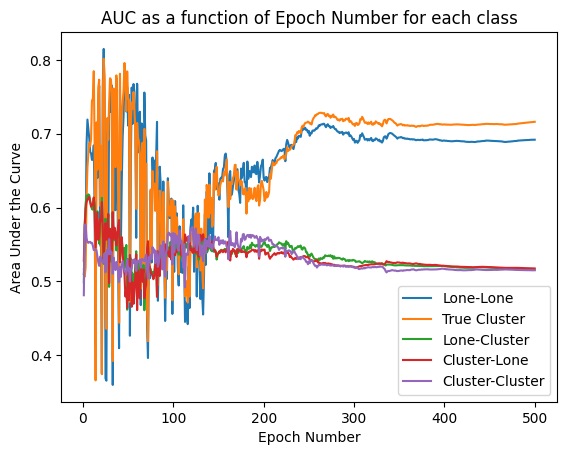

In [10]:
# Optionally plot AUC over epochs for each class with custom labels
createAUCDataPointsMulticlass(scores, truth_labels, epochNum//2)

### 4 Layer Model Loss & ROC/AUC

In [11]:
def loadDataH5(fileName):
    dataDict = {}
    with h5py.File(fileName, 'r') as file:
        for key in file.keys():
            dataDict[key] = np.array(file[key])
    return dataDict

data = loadDataH5("/storage/mxg1065/MultiClassGNN/data_four_layers.h5")
lossData = data["lossData"]
scores = data["scores"]
truth_labels = data["truth_labels"]
avgLoss_TrueTrain = data['avgLoss_TrueTrain']
avgLoss_TrueTest = data['avgLoss_TrueTest']
avgLoss_BkgTrain = data['avgLoss_BkgTrain']
avgLoss_BkgTest = data['avgLoss_BkgTest']

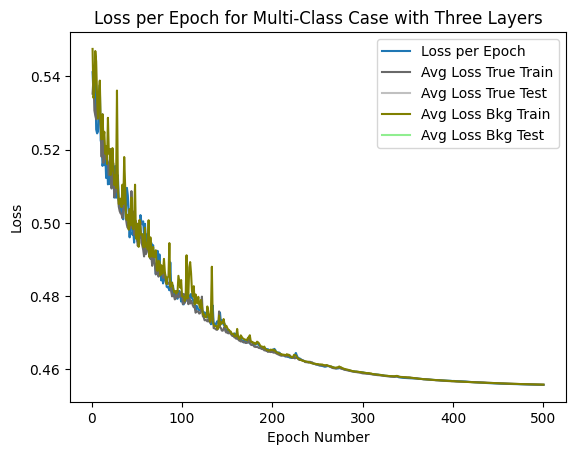

In [14]:
plt.plot(epoch_number, lossData, label='Loss per Epoch')
plt.plot(epoch_number, avgLoss_TrueTrain, 'dimgray', label='Avg Loss True Train')
plt.plot(epoch_number, avgLoss_TrueTest, 'silver', label='Avg Loss True Test')
plt.plot(epoch_number, avgLoss_BkgTrain, 'olive', label = 'Avg Loss Bkg Train')
plt.plot(epoch_number, avgLoss_BkgTest, 'lightgreen', label = 'Avg Loss Bkg Test')
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.title("Loss per Epoch for Multi-Class Case with Three Layers")
plt.legend()
plt.show()

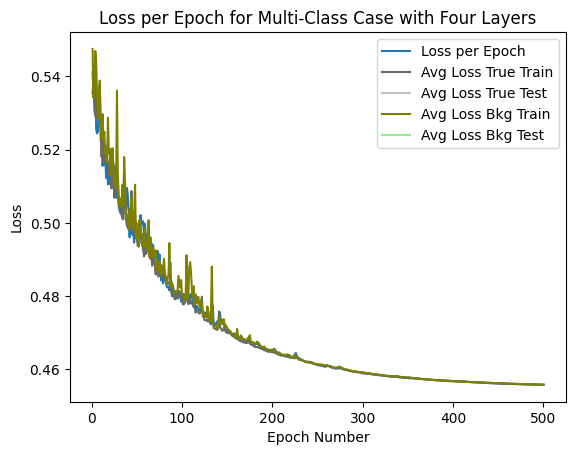

In [15]:
plt.plot(epoch_number, lossData, label='Loss per Epoch')
plt.plot(epoch_number, avgLoss_TrueTrain, 'dimgray', label='Avg Loss True Train')
plt.plot(epoch_number, avgLoss_TrueTest, 'silver', label='Avg Loss True Test')
plt.plot(epoch_number, avgLoss_BkgTrain, 'olive', label = 'Avg Loss Bkg Train')
plt.plot(epoch_number, avgLoss_BkgTest, 'lightgreen', label = 'Avg Loss Bkg Test')
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.title("Loss per Epoch for Multi-Class Case with Four Layers")
plt.legend()
plt.show()

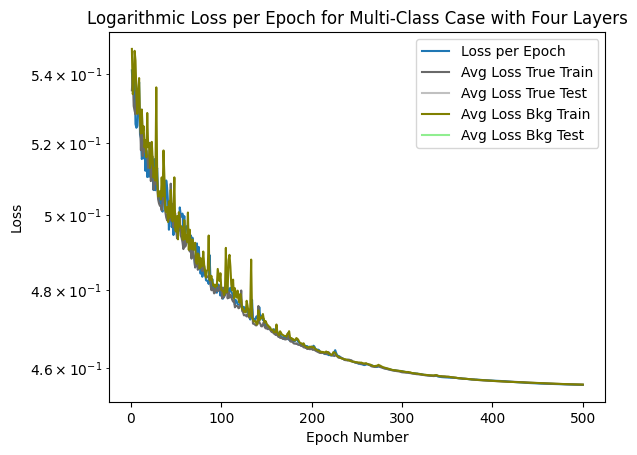

In [17]:
plt.plot(epoch_number, lossData, label='Loss per Epoch')
plt.plot(epoch_number, avgLoss_TrueTrain, 'dimgray', label='Avg Loss True Train')
plt.plot(epoch_number, avgLoss_TrueTest, 'silver', label='Avg Loss True Test')
plt.plot(epoch_number, avgLoss_BkgTrain, 'olive', label = 'Avg Loss Bkg Train')
plt.plot(epoch_number, avgLoss_BkgTest, 'lightgreen', label = 'Avg Loss Bkg Test')
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.yscale('log')
plt.title("Logarithmic Loss per Epoch for Multi-Class Case with Four Layers")
plt.legend()
plt.show()

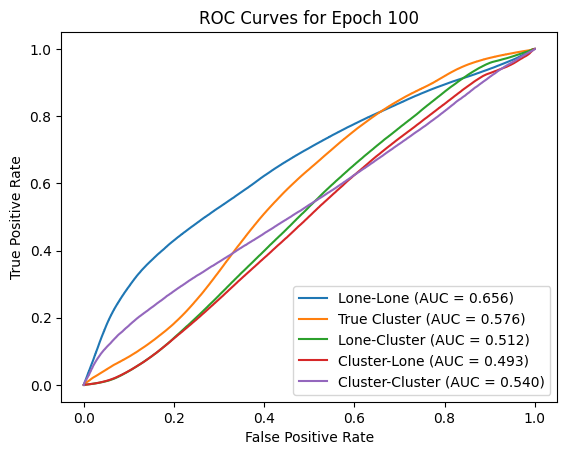

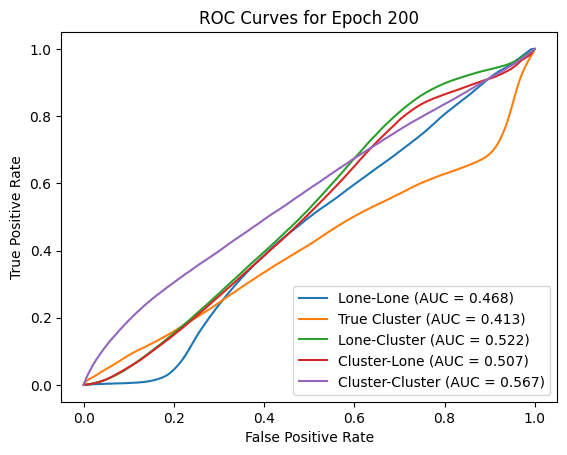

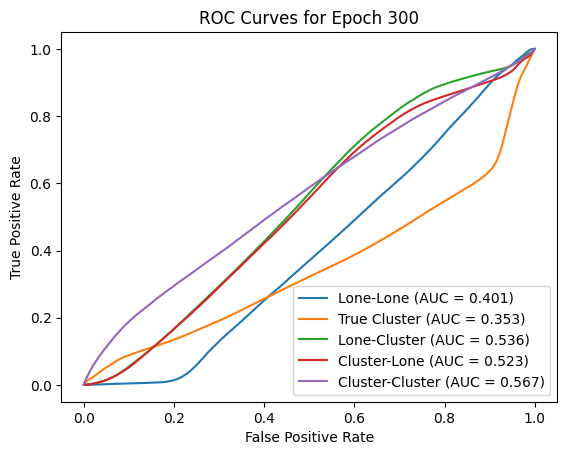

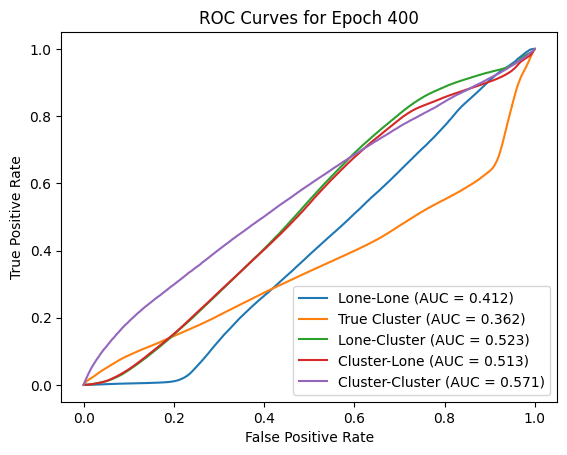

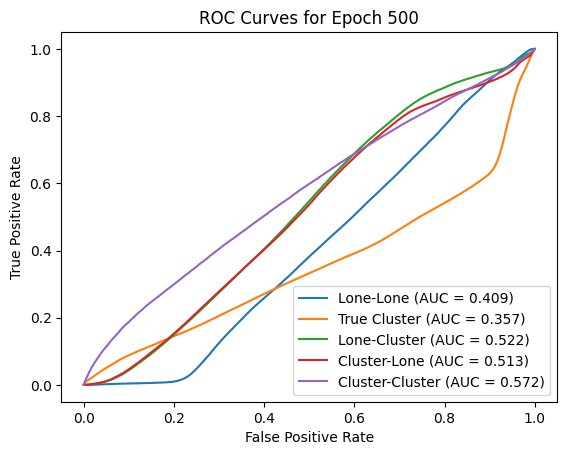

In [18]:
for i in range(0, epochNum//2):
    if (i+1) % intervalShowingROCGraph == 0:
        plotROCCurveMulticlass(scores[i], truth_labels[i], i+1)

In [ ]:
createAUCDataPointsMulticlass(scores, truth_labels, epochNum//2)

### 5 Layer Model Loss & ROC/AUC

In [ ]:
def loadDataH5(fileName):
    dataDict = {}
    with h5py.File(fileName, 'r') as file:
        for key in file.keys():
            dataDict[key] = np.array(file[key])
    return dataDict

data = loadDataH5("/storage/mxg1065/MultiClassGNN/data_five_layers.h5")
lossData = data["lossData"]
scores = data["scores"]
truth_labels = data["truth_labels"]
avgLoss_TrueTrain = data['avgLoss_TrueTrain']
avgLoss_TrueTest = data['avgLoss_TrueTest']
avgLoss_BkgTrain = data['avgLoss_BkgTrain']
avgLoss_BkgTest = data['avgLoss_BkgTest']

In [ ]:
plt.plot(epoch_number, lossData, label='Loss per Epoch')
plt.plot(epoch_number, avgLoss_TrueTrain, 'dimgray', label='Avg Loss True Train')
plt.plot(epoch_number, avgLoss_TrueTest, 'silver', label='Avg Loss True Test')
plt.plot(epoch_number, avgLoss_BkgTrain, 'olive', label = 'Avg Loss Bkg Train')
plt.plot(epoch_number, avgLoss_BkgTest, 'lightgreen', label = 'Avg Loss Bkg Test')
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.title("Loss per Epoch for Multi-Class Case with Five Layers")
plt.legend()
plt.show()

In [ ]:
plt.plot(epoch_number, lossData, label='Loss per Epoch')
plt.plot(epoch_number, avgLoss_TrueTrain, 'dimgray', label='Avg Loss True Train')
plt.plot(epoch_number, avgLoss_TrueTest, 'silver', label='Avg Loss True Test')
plt.plot(epoch_number, avgLoss_BkgTrain, 'olive', label = 'Avg Loss Bkg Train')
plt.plot(epoch_number, avgLoss_BkgTest, 'lightgreen', label = 'Avg Loss Bkg Test')
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.yscale('log)
plt.title("Logarithmic Loss per Epoch for Multi-Class Case with Five Layers")
plt.legend()
plt.show()

In [ ]:
for i in range(0, epochNum//2):
    if (i+1) % intervalShowingROCGraph == 0:
        plotROCCurveMulticlass(scores[i], truth_labels[i], i+1)

In [ ]:
createAUCDataPointsMulticlass(scores, truth_labels, epochNum//2)